In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [5]:
example = "经常有意见分歧意见常常会有分歧"
len(example)

15

In [3]:
words = ["经常","经","有","有意见","意见","分歧","见","意","见分歧","分"]
prob_list = [0.1,0.05,0.1,0.1,0.2,0.2,0.05,0.05,0.05,0.1]
#word_dict = dict(zip(words,-np.log(prob_list)))

In [4]:
word_dict

{'经常': 2.3025850929940455,
 '经': 2.995732273553991,
 '有': 2.3025850929940455,
 '有意见': 2.3025850929940455,
 '意见': 1.6094379124341003,
 '分歧': 1.6094379124341003,
 '见': 2.995732273553991,
 '意': 2.995732273553991,
 '见分歧': 2.995732273553991,
 '分': 2.3025850929940455}

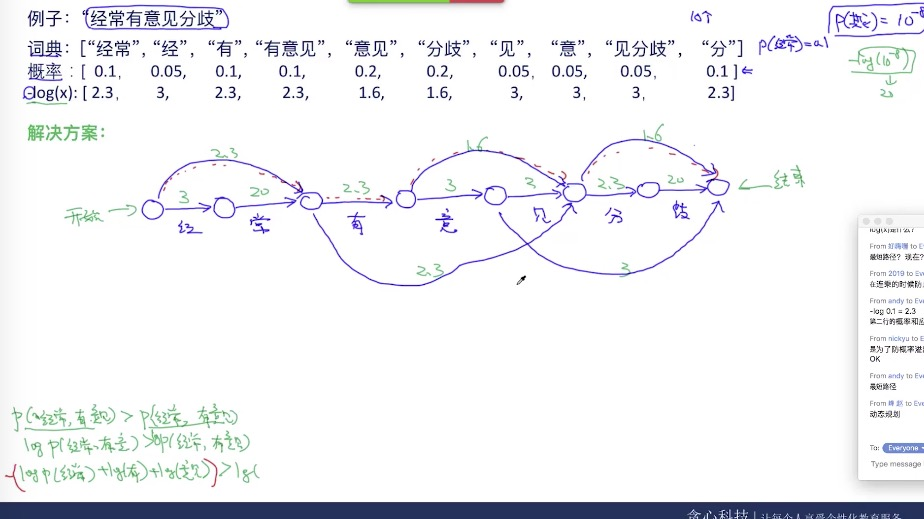

In [5]:
display(Image("/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP训练营笔记/图片/21F3D312-5435-4739-AF96-89C38EC6B8A1.png"))

In [6]:
def search_prob(word,word_dict=word_dict):
    try:
        return word_dict[word]
    except Exception:
        return 10**(-8)

def check_dict(word):
    return word in word_vector

def check_dict(word):
    return word in word_dict

def slide_word(strings,start,end):
    result_index,result_check = [],[]
    for i in range(start,end+1):
        word = strings[start:i]
        check = check_dict(word)
        if check:
            result_check.append(check)
            result_index = (start,i)
    return len(result_index) > 0 and result_index or False
slide_word(example,3,7)

def Viterbi(string,word_dict,opcode=[10**-8],word_split=[],prob = 0): 
    t ,m = 0,len(string)
    L,R , result ,testlog = [],[],[],[]
    disposal_data = string
    for i in range(m+1):
        test = slide_word(string,i,m)
        if test:
            t+=1
            l , r  = test
            L.append(l)
            R.append(r)
            if t == 1:
                word = string[l:r]
                prob += search_prob(word)
                disposal_data = disposal_data.replace(word,"/")
                result.append(word)
            elif l in R:
                word = string[l:r]
                prob += search_prob(word)
                disposal_data = disposal_data.replace(word,"/")
                result.append(word)
            print(string[l:r],l,r)

    check_symbols = len(set(disposal_data))
    opcode.append(check_symbols)
    word_split = word_split + result
    if opcode[-1]-opcode[-2]==0:
        expr = prob+10**(-8)*len(disposal_data.replace('/',''))
        return expr,word_split+list(filter(lambda x : x !='' ,disposal_data.split('/')))
    return Viterbi(disposal_data,word_dict,opcode,word_split,prob)
Viterbi(example,word_dict)

经常 0 2
有意见 2 5
意见 3 5
见分歧 4 7
分歧 5 7
意见 7 9
见 8 9
有 12 13
分歧 13 15
有 7 8


(11.736069046284438, ['经常', '有意见', '分歧', '意见', '分歧', '有', '常常会'])

In [7]:
def find_max(vector,start,score):
    left ,right = vector[:,0] ,vector[:,-1]
    if start in left:
        tmp = left == start
        tmp_score = score[tmp]
        tmp_vector = vector[tmp]
    check_left = tmp_vector[np.ravel(np.argwhere(tmp_score==tmp_score.max()))][0]
    end = check_left[-1]
    if end in right:
        temp = right == end
        temp_score = temp[temp]
        temp_vector = vector[temp]
    check_right = temp_vector[np.ravel(np.argwhere(temp_score==temp_score.min()))][0]
    start = check_right[0]
    return [start,end]

find_max(np.array([[ 0.,  2.],
        [ 0.,  0.],
        [ 2.,  5.],
        [ 3.,  5.],
        [ 4.,  7.],
        [ 5.,  7.],
        [ 0.,  0.],
        [ 7.,  9.],
        [ 8.,  9.],
        [ 0.,  0.],
        [ 0.,  0.],
        [11., 12.],
        [12., 14.],
        [ 0.,  0.]]),4,np.array([2., 0., 3., 2., 3., 2., 0., 2., 1., 0., 0., 1., 2., 0.]))

[4.0, 7.0]

In [13]:
#

def check_word(split_strings,word_dict):
    if split_strings in word_dict:
        return True
    else:
        return False

def route(strings):
    m = len(strings)
    f , point = np.zeros(m) , np.zeros((m,2))
    init_score  = np.inf
    for end in range(m+1): 
        init_link = end
        for start in range(init_link):
            score = end-start
            if score < init_score:  
                split_strings = strings[start:end]
                test_word = check_word(split_strings,word_dict)
                if test_word:
                    point[start] = [start,end]
                    init_link = end
                    f[start] = score
    return f[f>0],point[f>0]
route("这个时间经常会有你想想不到的意见分歧，见怪不怪了"),example

((array([2., 1., 2., 3., 2., 1.]),
  array([[ 4.,  6.],
         [ 7.,  8.],
         [14., 16.],
         [15., 18.],
         [16., 18.],
         [19., 20.]])),
 '经常有意见分歧意见常常会有分歧')

In [14]:
def get_link(start):
    scores,link = route(example)
    left , right = link[:,0],link[:,-1]
    testl = start==left
    testr = start==right
    if start == 0:
        return link[0]
    else:
        if testl.sum()>0:
            temp = link[right==right[testl]]
            i,j = temp.min(),temp.max()
            return i,j
get_link(4)

(4.0, 7.0)

In [19]:
def viterbi_split_word(strings):
    surplus = strings
    re = __import__("re")
    del_word = '1'
    words , node = [del_word],dict()
    scores,link = route(strings)
    left , right = link[:,0],link[:,-1]
    score = 0
    n = -1
    for start in left:
        i,j = get_link(start)
        i,j = int(i),int(j)
        word = strings[i:j]
        if i not in node:
            node.update({i:j})     
            if word[0] == words[-1][-1]:     
                word = word.replace(word[0],'')
                del_i = i
                i = strings.index(word)
                node.update({i:j})
            if (word[-1] == words[-1][-1]):
                del_word = word
            words.append(word)
            if word!=del_word:
                if check_word(word,word_dict):
                    score += word_dict[word]
            surplus = surplus.replace(word,'',1)       
    del node[del_i]
    words.remove(del_word)
    return score+len(surplus)*(10**-8),words,node
viterbi_split_word("这个时间经常会有你想想不到的意见分歧，见怪不怪了")

TypeError: cannot unpack non-iterable NoneType object

In [20]:
import numpy as np

def check_word(split_strings,word_dict):
    if split_strings in word_dict:
        return True
    else:
        return False

def route(strings):
    m = len(strings)
    f , point = np.zeros(m) , np.zeros((m,2))
    init_score  = np.inf
    for end in range(m+1): 
        init_link = end
        for start in range(init_link):
            score = end-start
            if score < init_score:  
                split_strings = strings[start:end]
                test_word = check_word(split_strings,word_dict)
                if test_word:
                    point[start] = [start,end]
                    init_link = end
                    f[start] = score
    return f[f>0],point[f>0]

def get_link(start):
    scores,link = route(example)
    left , right = link[:,0],link[:,-1]
    testl = start==left
    testr = start==right
    if start == 0:
        return link[0]
    else:
        if testl.sum()>0:
            temp = link[right==right[testl]]
            i,j = temp.min(),temp.max()
            return i,j

def viterbi_split_word(strings):
    surplus = strings
    re = __import__("re")
    del_word = '1'
    words , node = [del_word],dict()
    scores,link = route(strings)
    left , right = link[:,0],link[:,-1]
    score = 0
    n = -1
    for start in left:
        i,j = get_link(start)
        i,j = int(i),int(j)
        word = strings[i:j]
        if i not in node:
            node.update({i:j})     
            if word[0] == words[-1][-1]:     
                word = word.replace(word[0],'')
                del_i = i
                i = strings.index(word)
                node.update({i:j})
            if (word[-1] == words[-1][-1]):
                if word in word_dict:
                    del_word = word
            words.append(word)
            if word!=del_word:
                score += word_dict[word]
            surplus = surplus.replace(word,'',1)       
    del node[del_i]
    words.remove(del_word)
    return score+len(surplus)*(10**-8),words,node

words = ["经常","经","有","有意见","意见","分歧","见","意","见分歧","分"]
prob_list = [0.1,0.05,0.1,0.1,0.2,0.2,0.05,0.05,0.05,0.1]
word_dict = dict(zip(words,-np.log(prob_list)))
viterbi_split_word("这个时间经常会")

KeyError: '经常会'